In [2]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Read the data set
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",na_values=['NA','?'])

In [4]:
# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 0s - loss: 1949.1950 - val_loss: 1653.4736
Epoch 2/1000
1500/1500 - 0s - loss: 1197.2135 - val_loss: 649.5570
Epoch 3/1000
1500/1500 - 0s - loss: 352.4449 - val_loss: 237.7485
Epoch 4/1000
1500/1500 - 0s - loss: 226.6351 - val_loss: 201.8518
Epoch 5/1000
1500/1500 - 0s - loss: 191.7355 - val_loss: 172.2938
Epoch 6/1000
1500/1500 - 0s - loss: 160.6924 - val_loss: 144.3908
Epoch 7/1000
1500/1500 - 0s - loss: 133.3705 - val_loss: 121.3890
Epoch 8/1000
1500/1500 - 0s - loss: 109.7794 - val_loss: 99.9756
Epoch 9/1000
1500/1500 - 0s - loss: 90.1879 - val_loss: 83.9876
Epoch 10/1000
1500/1500 - 0s - loss: 74.5167 - val_loss: 71.0943
Epoch 11/1000
1500/1500 - 0s - loss: 62.5607 - val_loss: 60.9340
Epoch 12/1000
1500/1500 - 0s - loss: 53.0835 - val_loss: 53.4446
Epoch 13/1000
1500/1500 - 0s - loss: 46.3059 - val_loss: 47.2851
Epoch 14/1000
1500/1500 - 0s - loss: 40.2488 - val_loss: 42.4366
Epoch 15/1000
1500/1500 - 0s - los

In [9]:
from sklearn import metrics
import numpy as np

# Predict
pred = model.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.6494934480214944


In [12]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.xlabel('dataset')
    plt.legend()
    plt.show()

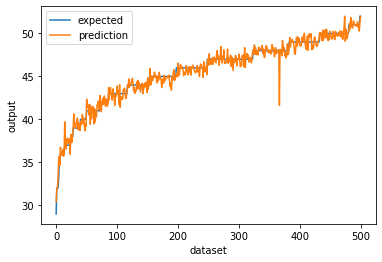

In [13]:
# Plot the chart
chart_regression(pred.flatten(),y_test)

The above chart is the most accurate on lower age.